In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load dataset
data = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# Show first 5 rows
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [19]:
# Drop irrelevant or text columns
data = data.select_dtypes(include=['int64', 'float64'])

#Check for null values
data.isnull().sum()



ORDERNUMBER        0
QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
MSRP               0
dtype: int64

In [20]:
# Drop missing values
data = data.dropna()

# Scale the data for better clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("Data after scaling:\n", scaled_data[:5])


Data after scaling:
 [[-1.64794709 -0.52289086  0.5969775  -1.05705871 -0.37082523 -1.42703863
  -1.39290889 -1.16517009 -0.14224584]
 [-1.4958875  -0.11220131 -0.11445035 -0.34701507 -0.42789707 -0.59624258
  -0.57233673 -1.16517009 -0.14224584]
 [-1.35468931  0.60650538  0.54938372 -1.05705871  0.17944282  0.23455347
  -0.02528862 -1.16517009 -0.14224584]
 [-1.23521391  1.01719493 -0.01975856 -0.11033386  0.10470098  0.23455347
   0.24823543 -1.16517009 -0.14224584]
 [-1.08315432  1.42788447  0.81015797  1.78311584  0.89673966  1.06534953
   0.79528354 -1.16517009 -0.14224584]]


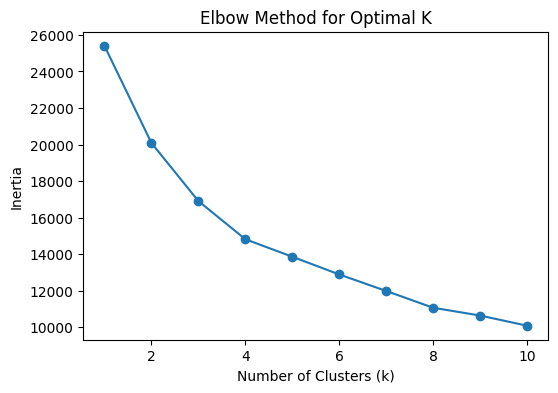

In [4]:
# Elbow method to determine number of clusters
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Graph
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [5]:
# Based on elbow graph, assume optimal k = 3 (you can change based on graph)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to data
data['Cluster'] = kmeans.labels_

# Display first few results
data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,Cluster
0,10107,30,95.70,2,2871.00,1,2,2003,95,1
1,10121,34,81.35,5,2765.90,2,5,2003,95,2
2,10134,41,94.74,2,3884.34,3,7,2003,95,1
3,10145,45,83.26,6,3746.70,3,8,2003,95,1
4,10159,49,100.00,14,5205.27,4,10,2003,95,1


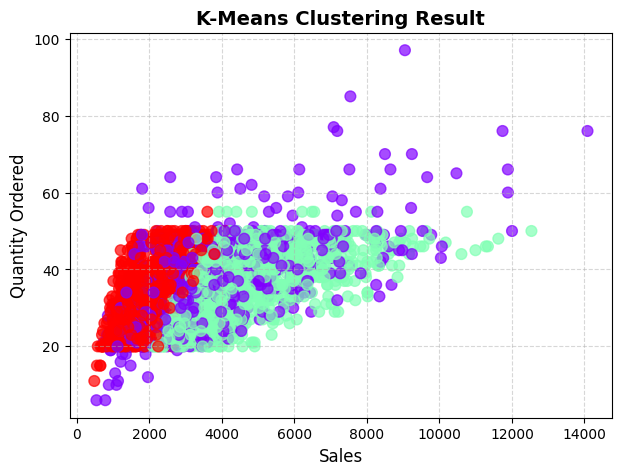

In [8]:
# Simple and clear K-Means cluster visualization with meaningful features
plt.figure(figsize=(7,5))
plt.scatter(data['SALES'], data['QUANTITYORDERED'],
            c=data['Cluster'], cmap='rainbow', s=60, alpha=0.7)
plt.title("K-Means Clustering Result", fontsize=14, fontweight='bold')
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Quantity Ordered", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()